In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

Известно, что одна из линий по расфасовке чипсов даёт упаковки с более вариабельным весом продукта, чем вторая.
Дисперсии равны 0.000576 г^2 и 0.001089 г^2 соответственно, средние значения веса в выборках из 100 и 98 элементов — 80.02 г и 79.98 г.

двусторонняя гипотеза:

H0 : средний вес продукта в упаковках, произведённых на двух линиях,
совпадает.

H1 : средние веса продукта в упаковках, произведённых на двух линиях,
различаются 

Определим уровень значимости. Берем a = 0.01

In [187]:
ex_1 = np.random.normal(80.02,0.000576,100)
ex_2 = np.random.normal(79.98,0.001089,98)

Text(0.5, 1.0, 'test')

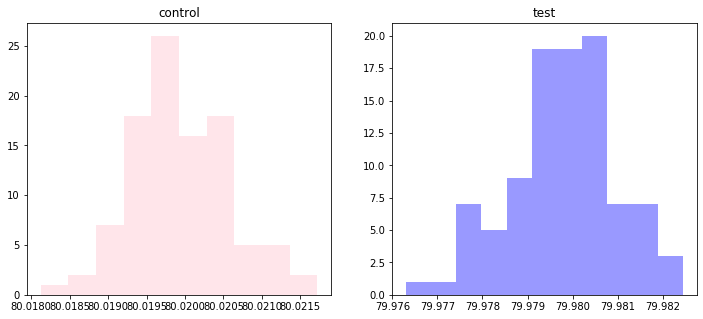

In [188]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(ex_1,color = 'pink',hist = True, kde = False,ax = ax)
ax.set_title('control')

ax=f.add_subplot(122)
sns.distplot(ex_2,color = 'blue',hist = True, kde = False,ax=ax)
ax.set_title('test')

In [189]:
mean_b = np.mean(ex_2)
mean_a = np.mean( ex_1)
print('Средний вес пачки в первой группе = ',mean_a)
print('Средний вес пачки во второй группе = ',mean_b)

Средний чек в контрольной группе =  80.01995129002131
Средний чек в заказ в тестовой группе =  79.97978719730344


In [190]:
mean_diff = mean_b - mean_a
print('Разница выборочных средних = ',mean_diff)

Разница выборочных средних =  -0.040164092717873245


In [191]:
#количество элементов в выборках
n1 = len(ex_1)
n2 = len(ex_2)

#дисперсии
var_a =  np.std(ex_1, ddof=0)
var_b = np.std(ex_2, ddof=0)

#Дисперсия распределения разности средних
sem = np.sqrt(var_a/n1 + var_b/n2)

print('Дисперсия распределения разности средних = ',sem)
print('дисперсии = ',var_a, var_b)

Дисперсия распределения разности средних =  0.004284653391642833
дисперсии =  0.0006446651120611979 0.0011673371494586365


In [192]:
z = mean_diff/sem
print('z-критерий =',z)

z-критерий = -9.37394207807167


In [193]:
#степени свободы
df = (n1 + n2) - 2

#p - value
#p = 1-stats.norm.cdf(z, mean_diff, sem)
#p= stats.norm.cdf(z,np.mean(diff),np.std(diff))
p= stats.norm.cdf(z, loc=0, scale=1)*2

if p > 0.05:
    print('Нет статистически значимой разницы','\nz - критерий = ',z,'\np-value =',p)
else:
    print('Есть статистически значимая разница','\nz - критерий = ',z,'\np-value =',p)

Есть статистически значимая разница 
z - критерий =  -9.37394207807167 
p-value = 6.98729455795886e-21


Известно, что одна из линий по расфасовке чипсов даёт упаковки с более вариабельным весом продукта, чем вторая.
Дисперсии равны 0.000576 г^2 и 0.001089 г^2 соответственно, средние значения веса в выборках из 100 и 98 элементов — 80.02 г и 79.98 г.

левостороння гипотеза:

H0 : средний вес продукта в упаковках, произведённых на двух линиях,
совпадает.

H1 : средние веса продукта в упаковках, произведённых на двух линиях,
различаются и на первой линии вес меньше, чем во второй

Определим уровень значимости. Берем a = 0.01

In [199]:
p= 1-stats.norm.cdf(z, loc=0, scale=1)

if p > 0.05:
    print('Не можем отвергнуть нулевую гипотезу о том, что средний вес продукта в упаковках, произведённых на двух линиях,совпадает','\nz - критерий = ',z,'\np-value =',p)
else:
    print('Можем отвергнуть нулевую гипотезу о том, что на первой линии вес меньше, чем во второй','\nz - критерий = ',z,'\np-value =',p)

Не можем отвергнуть нулевую гипотезу о том, что средний вес продукта в упаковках, произведённых на двух линиях,совпадает 
z - критерий =  -9.37394207807167 
p-value = 1.0


Известно, что одна из линий по расфасовке чипсов даёт упаковки с более вариабельным весом продукта, чем вторая.
Дисперсии равны 0.000576 г^2 и 0.001089 г^2 соответственно, средние значения веса в выборках из 100 и 98 элементов — 80.02 г и 79.98 г.

правостороняя гипотеза:

H0 : средний вес продукта в упаковках, произведённых на двух линиях,
совпадает.

H1 : средние веса продукта в упаковках, произведённых на двух линиях,
различаются и на первой линии вес больше, чем во второй

Определим уровень значимости. Берем a = 0.01

In [200]:
p= stats.norm.cdf(z, loc=0, scale=1)

if p > 0.05:
    print('Не можем отвергнуть нулевую гипотезу о том, что средний вес продукта в упаковках, произведённых на двух линиях,совпадает','\nz - критерий = ',z,'\np-value =',p)
else:
    print('Можем отвергнуть нулевую гипотезу о том, что средний вес продукта в упаковках, произведённых на двух линиях,совпадает','\nz - критерий = ',z,'\np-value =',p)

Можем отвергнуть нулевую гипотезу о том, что средний вес продукта в упаковках, произведённых на двух линиях,совпадает 
z - критерий =  -9.37394207807167 
p-value = 3.49364727897943e-21
